# Outline


### 1. Import Data

In [66]:
import pandas as pd
import numpy as np

In [67]:
#import data
datatree_label = pd.read_csv('D:/datatree_label.csv') 
datatree_nolabel = pd.read_csv('D:/datatree_nolabel.csv') #without label 

In [68]:
datatree_label.tail()


,ID Nasabah,Jenis Kelamin,Single,Tinggal di Kota,usia,Perokok,Budget,Kesukaan,Tertarik Beli?
970,300,0,1,0,29,0,medium,Busana,0
971,261,0,1,0,34,0,low,Lainnya,0
972,1011,1,1,0,28,0,low,Seni,0
973,273,1,1,1,39,1,low,Busana,0
974,546,1,1,0,27,1,medium,Busana,1


In [69]:
datatree_nolabel.tail()

,ID Nasabah,Jenis Kelamin,Single,Tinggal di Kota,usia,Perokok,Budget,Kesukaan
104,960,0,1,1,28,0,medium,Busana
105,501,1,1,0,39,0,low,Lainnya
106,231,0,1,0,34,0,high,Seni
107,292,1,1,0,35,0,medium,Tekno
108,481,1,1,0,37,0,low,Seni


### 2. Pembuatan Peubah dummy

###### Menyamakan struktur

In [70]:
datatree_nolabel['Tertarik Beli?'] = 9999
datatree_nolabel.head()

,ID Nasabah,Jenis Kelamin,Single,Tinggal di Kota,usia,Perokok,Budget,Kesukaan,Tertarik Beli?
0,436,1,1,1,34,0,medium,Busana,9999
1,403,0,1,0,33,0,low,Tekno,9999
2,119,0,1,0,38,1,low,Tekno,9999
3,565,1,1,1,32,0,medium,Seni,9999
4,281,0,0,0,29,0,low,Tekno,9999


###### Gabungkan dua data

In [71]:
datatree = datatree_label.append(datatree_nolabel) 

In [72]:
#see dimention of data
datatree.shape

(1084, 9)

###### Pendefisian Data

In [73]:
## define the value from variable
datatree['Jenis Kelamin'] = datatree['Jenis Kelamin'].map({1:'Laki-Laki',
                                                           0:'Perempuan'})
datatree['Single'] = datatree['Single'].map({1:'Single',
                                             0:'Tidak Single'})
datatree['Tinggal di Kota'] = datatree['Tinggal di Kota'].map({1:'Tinggal di kota',
                                                               0:'Tinggal di pedesaan'})
datatree['Perokok'] = datatree['Perokok'].map({1:'Perokok',
                                               0:'Bukan Perokok'})


###### Eksplorasi Data

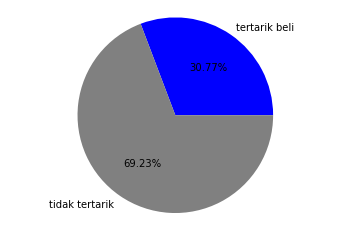

In [74]:
# library untuk eksplorasi data
import matplotlib.pyplot as plt
import seaborn as sns

# menghitung ukuran diagram pie
size = [sum(datatree_label['Tertarik Beli?']),
        len(datatree_label['Tertarik Beli?'])-sum(datatree_label['Tertarik Beli?'])]

labels = ['tertarik beli','tidak tertarik']

# memilih warna
color = ["blue","grey"]

# diagram pie 
plt.pie(size,labels=labels,colors=color,autopct='%2.2f%%')

plt.axis('equal')
plt.show()

In [75]:
#make dummy varible
list(datatree)

['ID Nasabah',
 'Jenis Kelamin',
 'Single',
 'Tinggal di Kota',
 'usia',
 'Perokok',
 'Budget',
 'Kesukaan',
 'Tertarik Beli?']

In [76]:
datatree.head()

,ID Nasabah,Jenis Kelamin,Single,Tinggal di Kota,usia,Perokok,Budget,Kesukaan,Tertarik Beli?
0,609,Laki-Laki,Single,Tinggal di pedesaan,39,Bukan Perokok,medium,Tekno,1
1,424,Laki-Laki,Single,Tinggal di pedesaan,39,Bukan Perokok,medium,Tekno,1
2,983,Perempuan,Single,Tinggal di kota,39,Bukan Perokok,low,Seni,0
3,520,Laki-Laki,Single,Tinggal di pedesaan,32,Perokok,low,Seni,1
4,868,Laki-Laki,Single,Tinggal di pedesaan,38,Bukan Perokok,low,Tekno,0


In [77]:
print("peubah awal:\n", list(datatree),"\n")

peubah awal:
 ['ID Nasabah', 'Jenis Kelamin', 'Single', 'Tinggal di Kota', 'usia', 'Perokok', 'Budget', 'Kesukaan', 'Tertarik Beli?'] 



In [78]:
peubah = list(datatree)[1:4]+list(datatree)[5:8]
peubah

['Jenis Kelamin', 'Single', 'Tinggal di Kota', 'Perokok', 'Budget', 'Kesukaan']

In [79]:
# pembuatan dummy variable secara otomatis untuk semua peubah kategorik
datatree_dummy = pd.get_dummies(datatree,drop_first=True,columns=peubah)
print("peubah setelah dummy dibuat:\n", list(datatree_dummy),"\n")

peubah setelah dummy dibuat:
 ['ID Nasabah', 'usia', 'Tertarik Beli?', 'Jenis Kelamin_Perempuan', 'Single_Tidak Single', 'Tinggal di Kota_Tinggal di pedesaan', 'Perokok_Perokok', 'Budget_low', 'Budget_medium', 'Kesukaan_Lainnya', 'Kesukaan_Seni', 'Kesukaan_Tekno'] 



###### Pemisahan kembali

In [80]:
datatree_label = datatree_dummy[datatree_dummy['Tertarik Beli?'] != 9999]
datatree_nolabel = datatree_dummy[datatree_dummy['Tertarik Beli?'] == 9999]

In [81]:
datatree_label.head()

,ID Nasabah,usia,Tertarik Beli?,Jenis Kelamin_Perempuan,Single_Tidak Single,Tinggal di Kota_Tinggal di pedesaan,Perokok_Perokok,Budget_low,Budget_medium,Kesukaan_Lainnya,Kesukaan_Seni,Kesukaan_Tekno
0,609,39,1,0,0,1,0,0,1,0,0,1
1,424,39,1,0,0,1,0,0,1,0,0,1
2,983,39,0,1,0,0,0,1,0,0,1,0
3,520,32,1,0,0,1,1,1,0,0,1,0
4,868,38,0,0,0,1,0,1,0,0,0,1


In [82]:
datatree_nolabel.head()

,ID Nasabah,usia,Tertarik Beli?,Jenis Kelamin_Perempuan,Single_Tidak Single,Tinggal di Kota_Tinggal di pedesaan,Perokok_Perokok,Budget_low,Budget_medium,Kesukaan_Lainnya,Kesukaan_Seni,Kesukaan_Tekno
0,436,34,9999,0,0,0,0,0,1,0,0,0
1,403,33,9999,1,0,1,0,1,0,0,0,1
2,119,38,9999,1,0,1,1,1,0,0,0,1
3,565,32,9999,0,0,0,0,0,1,0,1,0
4,281,29,9999,1,1,1,0,1,0,0,0,1


In [83]:
datatree_label=datatree_dummy[datatree_dummy['Tertarik Beli?']<100]

### 3. Pembagian data

In [84]:
peubah_penjelas = list(datatree_dummy)[3:]+['usia']
peubah_penjelas

['Jenis Kelamin_Perempuan',
 'Single_Tidak Single',
 'Tinggal di Kota_Tinggal di pedesaan',
 'Perokok_Perokok',
 'Budget_low',
 'Budget_medium',
 'Kesukaan_Lainnya',
 'Kesukaan_Seni',
 'Kesukaan_Tekno',
 'usia']

In [85]:
y = datatree_label['Tertarik Beli?']

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(datatree_label[peubah_penjelas],y)

### 4. Modelling

In [88]:
import statsmodels.api as sm

logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.184461
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         Tertarik Beli?   No. Observations:                  731
Model:                          Logit   Df Residuals:                      721
Method:                           MLE   Df Model:                            9
Date:                Wed, 19 Oct 2022   Pseudo R-squ.:                  0.7058
Time:                        10:41:09   Log-Likelihood:                -134.84
converged:                       True   LL-Null:                       -458.30
Covariance Type:            nonrobust   LLR p-value:                1.763e-133
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Jenis Kelamin_Perempuan                -6.6908      0.765

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
logreg = LogisticRegression()

In [91]:
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
# akurasi data test
logreg.score(X_test,y_test)

0.9262295081967213

In [93]:
# akurasi data train
logreg.score(X_train,y_train)

0.9274965800273598

In [94]:
# library untuk menghitung skor validasi silang
from sklearn.model_selection import cross_val_score

# library untuk melakukan validasi silang secara berstrata
from sklearn.model_selection import StratifiedKFold

In [95]:
skfold = StratifiedKFold(n_splits = 5)
logreg_cv = cross_val_score(logreg, X_train,y_train,cv=skfold)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [96]:
print("Skor CV : \n",logreg_cv)
print("Rata-rata Skor CV : \n",logreg_cv.mean())

Skor CV : 
 [0.89795918 0.9109589  0.93150685 0.9109589  0.95890411]
Rata-rata Skor CV : 
 0.9220575901593515
